### Disclaimer
The following notes have the purpose to briefly describe notions and definitions used during the lectures. The notes should provide enough information to properly follow what explained during the course, but they do not represent a complete introduction to the subject.

# Discrete probability distributions

A discrete probability distribution assigns a probability to all possible discrete events
or outcomes of an experiment. 

The value $P(x)$ associated to an event $x$ is a **probability**, thus $0 \leq P(x) \leq 1$. Also, since a probability distribution assigns probabilities to **all** possible events, the sum of all values of a probability distribution must equal one: 

$\sum_x P(x) = 1$.

This equation is usually referred as **normalization** condition of the probability distribution.

### Example: Tossing a fair coin
If the experiment is a fair coin tossing, we have two possible events: head and tail. To construct the probability distribution for this experiment, we need to assign a probability to each of the two possible events: the probability to obtain head is $P(h) = 0.5$; the probability to obtain tail is $P(t) = 0.5$. We see that $P(h) + P(t) =1$.



## Sample probability distributions
In many cases, the probability distribution of an experiment is not known in advance.
Still, we can estimate the probability distribution by measuring the frequency
of appearence of every event. Clearly, this can be done only on a **finite sample**
of observations (or experiments) at our disposal. 

### Example: Measuring the probability of tossing a coin
Immagine for example that we don't know the probability to observe head or tail for a coin tossing. We can toss the coin $T = 100$ times (finite sample). We can count how many times $N_t$ we
observe tail and how many times $N_h$ we observe head. Our estimate for the sample probability distribution will be given by $P(h) = N_h / T$ and $P(t) = N_t / T$. 


### Python implementation
The script below simulates the experiment we just described.

In [15]:
import random


############
##this function simulates the tossing of a coin
##we call prob the probability to obtain head. 1 - prob is instead
## the probability to obtain tail.
def coin_toss (prob):
    p = random.random()
    if p <= prob:
        return 'h'
    return 't'
############




############
##this function repeats the tossing T times. The function also
##records the number of observations of head and tail
def repeat_coin_toss (T, prob):
    
    N_h = 0.0
    N_t = 0.0
    
    for t in range(0, T):
        
        outcome = coin_toss (prob)
        
        if outcome == 'h':
            N_h += 1.0
            
        if outcome == 't':
            N_t += 1.0
    
    
    N = N_h + N_t
    
    return N_h / N , N_t / N
############






T = 1000000
prob = 0.3


h, t = repeat_coin_toss (T, prob)


print ('Coin tossing experiment, where the probability to obtain head is P(h) = ', prob)
print ('The experiment is repeated T = ', T, ' times.\n')
print ('The sample probability distribution is :')
print ('P(h) = ', h)
print ('P(t) = ', t)
print ('P(t) + P(h) = ', h + t)



Coin tossing experiment, where the probability to obtain head is P(h) =  0.3
The experiment is repeated T =  1000000  times.

The sample probability distribution is :
P(h) =  0.30018
P(t) =  0.69982
P(t) + P(h) =  1.0


### Estimating the probability distribution of a sample of integer numbers
The same procedure described for coin tossing can be applied to any experiment. Immagine for example that possible outcomes of the experiment are integer numbers $x$. If we repeat the experiment $T$ times, our sample will be a list of integer numbers $x_1, x_2, \ldots, x_t, \ldots, x_T$ equal to the outcomes of our $T$ experiments. We can go over the list, and count the number of times $N_x$ that we observe a specific value of $x$. The sample probability distribution will be given by $P(x) = N_x / T$. To visualize the probability distribution, we will create a two dimensional plot where every point has coordinates $(x, P(x))$. This plot is usually called **histogram**, and provides a visual representation of the probability distribution $P(x)$.

We can also measure global quantities for the 
sample probability distribution. Common global measures are
the first moment or **average value**, defined as

$\langle x \rangle = \sum_{x} x P(x) = \frac{1}{T} \, \sum_{t=1}^T \, x_t$

and the second central moment or **variance**, defined as

$\sigma^2 = \sum_{x} (x - \langle x \rangle)^2 P(x) = \frac{1}{T} \sum_{t=1}^T \, (x_t - \langle x \rangle)^2$.

In the equations above, note that the first expression after the equal sign represent the
definition of the two moments on the sample distribution $P(x)$. The sum there ranges over all
possible values of the variable $x$. The expressions appearing on the rightmost part of the equations are instead computed directly on the sample $x_1, x_2, \ldots, x_t, \ldots, x_T$, and the sums run over all elements of the sample. In particular, we note that
the variance can be compute also as

$\sigma^2 = \frac{1}{T} \sum_{t=1}^T \, \left[ (x_t)^2  - 2 x_t \langle x \rangle + \langle x \rangle^2 \right] = \left[\frac{1}{T} \sum_{t=1}^T \, (x_t)^2 \right] - \langle x \rangle^2 = \langle x^2 \rangle - \langle x \rangle^2$.

Here $\langle x^2 \rangle$ is the so-called second moment of the distribution.


### Python implementation
In the code below, the integer numbers $x$ will represent the total number of heads that
we obtain by tossing a coin $N = 100$ times. By definition $0 \leq x \leq 100$. We repeat the experiment $T = 100$ times. Remember that here one experiment means tossing the coin $N$ times. In total, we will toss the coin $N \times T$ times.
Please note that the function written to estimate the probability distribution, the average value and the variance, can be applied to any arbitrary sequence of numbers $x_1, x_2, \ldots, x_t, \ldots, x_T$, not just the one considered in this example.

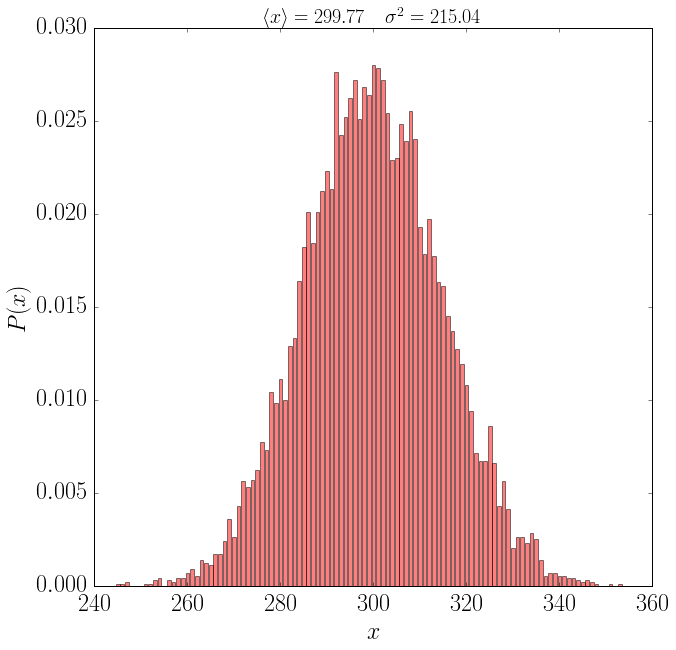

In [19]:
import random

import matplotlib.pyplot as plt
%matplotlib inline  


############
##this function simulates the tossing of a coin
##we call prob the probability to obtain head. 1 - prob is instead
## the probability to obtain tail.
def coin_toss (prob):
    p = random.random()
    if p <= prob:
        return 'h'
    return 't'
############


############
##This function now represents a single experiment
##this function repeats the tossing T times. The function also
##records the number of observations of head and tail
def repeat_coin_toss (T, prob):
    
    N_h = 0.0
    N_t = 0.0
    
    for t in range(0, T):
        
        outcome = coin_toss (prob)
        
        if outcome == 'h':
            N_h += 1.0
            
        if outcome == 't':
            N_t += 1.0
    
    
    return N_h
############




############
##Repeat the experiment T times
def repeat_experiment (T, N, prob):
    
    outcomes = []
    
    for t in range (0, T):
        N_h = repeat_coin_toss (N, prob)
        outcomes.append(N_h)
        
    return outcomes
############




#####################################
##Measure probability distribution. computes also average
## value and standard deviation
#####
def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance
#####################################







###################################

T = 10000
N = 1000
prob = 0.3



outcomes = repeat_experiment (T, N, prob)

pdf, av, var = measure_probability_distribution (outcomes)






##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = '$\\langle x \\rangle = ' + '% .2f' % av + ' \\quad \\sigma^2 = ' + '% .2f' % var + '$'
plt.title(title, fontsize = 20)


plt.xlabel('$x$')
plt.ylabel('$P(x)$')


##construct two lists for  visualization
x = []
Px = []
for q in pdf:
    x.append(q)
    Px.append(pdf[q])
    

plt.bar(x, Px, color = 'red', align='center', alpha=0.5)





plt.show()

### Additional example: Degree distribution of a network
We use the same portion of code provided above to compute the degree distribution of a network. Here the input sequence is the list of node degrees. The histogram will show the probability $P(x)$ that a node has degree equal to $x$.

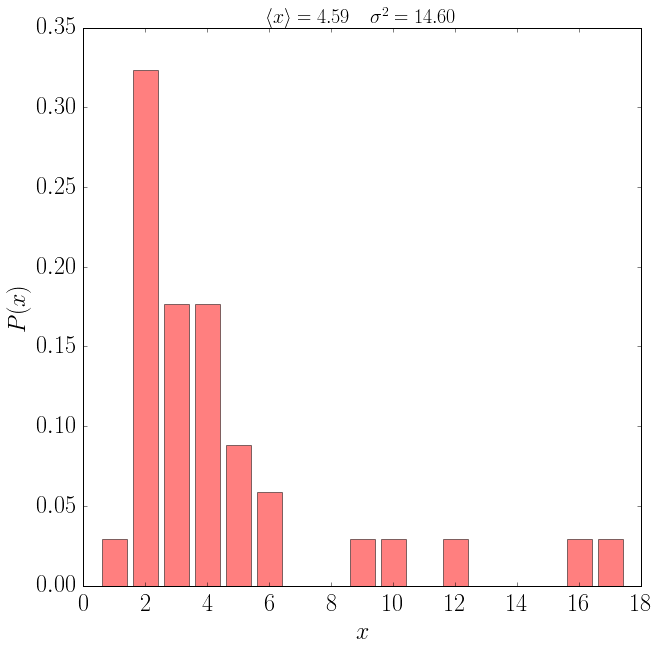

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  



#####################################
##Measure probability distribution. computes also average
## value and standard deviation
#####
def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
        
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, variance
#####################################







###################################

##import a network the library
##We can use any network
G = nx.karate_club_graph()


##Construct a list with the node degrees
outcomes = []
for n in G:
    outcomes.append(G.degree(n))

    

pdf, av, var = measure_probability_distribution (outcomes)






##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = '$\\langle x \\rangle = ' + '% .2f' % av + ' \\quad \\sigma^2 = ' + '% .2f' % var + '$'
plt.title(title, fontsize = 20)


plt.xlabel('$x$')
plt.ylabel('$P(x)$')


##construct two lists for  visualization
x = []
Px = []
for q in pdf:
    x.append(q)
    Px.append(pdf[q])
    

plt.bar(x, Px, color = 'red', align='center', alpha=0.5)





plt.show()

### Additional example: Quincunx

The following code implements this numerical [experiment](https://www.mathsisfun.com/data/quincunx.html).

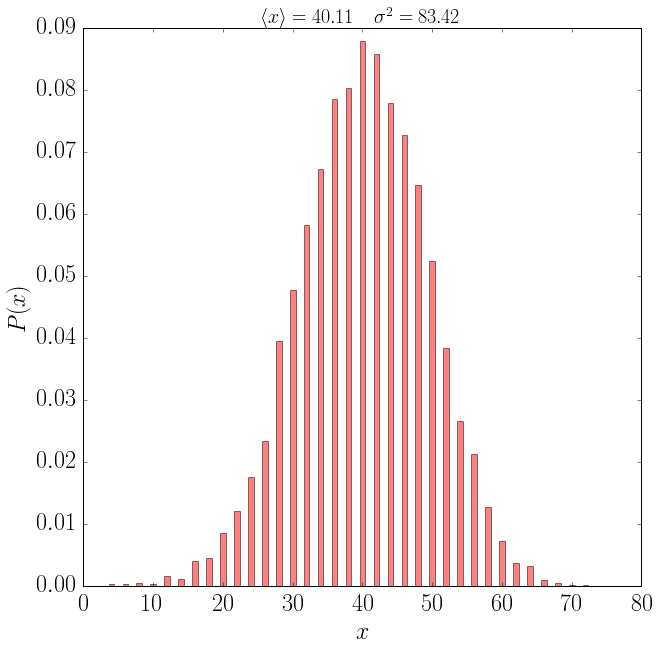

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  




##take left with given probability
#################################
def next_position (p):
    if random.random() < p :
        return -1
    return 1
#################################



##run a single experiment
#################################
def single_experiment (Rows, p):
    pos = 0
    for r in range (0, Rows):
        pos = pos + next_position (p)
    return pos
#################################



##run multiple experiments
#################################
def multiple_experiments (Nexp, Rows, p):
    data = []
    for e in range (0, Nexp):
        data.append(single_experiment (Rows, p))
    return data
#################################





Rows = 100
Nexp = 10000
p = 0.3





outcomes = multiple_experiments (Nexp, Rows, p)








pdf, av, var = measure_probability_distribution (outcomes)






##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = '$\\langle x \\rangle = ' + '% .2f' % av + ' \\quad \\sigma^2 = ' + '% .2f' % var + '$'
plt.title(title, fontsize = 20)


plt.xlabel('$x$')
plt.ylabel('$P(x)$')


##construct two lists for  visualization
x = []
Px = []
for q in pdf:
    x.append(q)
    Px.append(pdf[q])
    

plt.bar(x, Px, color = 'red', align='center', alpha=0.5)





plt.show()